In [28]:
import kdegree
import networkx as nx
import numpy as np

I'm gonna select the degree k and the dataset to anonymize:

In [29]:
# file_graph = "Dataset/graph_friend_5_10_5.csv"
# k = 2

# file_graph = "Dataset/graph_friend_100_10_100.csv"
# k = 10

# file_graph = "Dataset/wiki2009_cut_at_3000.csv"
# k = 200

file_graph = "Dataset/simpsons.csv"
k = 15

Then the dataset must be properly parsed to a graph. For now, it's basically a list of lists. 

['112', '143', '134', '135', '12', '26', '23', '163', '81', '170', '4', '39', '35', '120', '10', '27', '17', '199', '65', '72', '20', '130', '75', '169', '15', '74', '229', '202', '214', '151', '155', '5', '161', '215', '222', '25', '54', '11', '171', '38', '192', '110', '115', '183', '201', '189', '200', '36', '30', '50', '77', '37', '61', '141', '152', '63', '165', '158', '159', '136', '24', '43', '73', '185', '195', '29', '48', '28', '47', '126', '34', '204', '16', '18', '22', '53', '220', '211', '7', '8', '76', '193', '231', '142', '145', '1', '194', '33', '41', '64', '70', '71', '85', '89', '190', '230', '84', '221', '227', '6', '90', '107', '127', '187', '9', '44', '2', '147', '162', '225', '60', '14', '93', '101', '198', '119', '116', '94', '103', '111', '114', '213', '179', '92', '173', '177', '138', '88', '236', '46', '3', '42', '58', '62', '100', '184', '78', '223', '203', '83', '19', '166', '228', '139', '137', '167', '218', '49', '96', '82', '99', '235', '86', '238', '182',

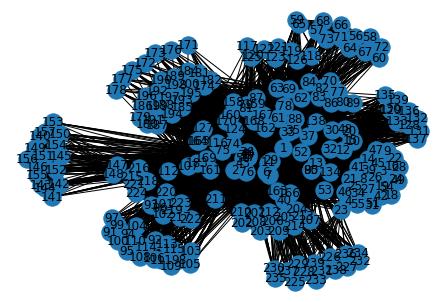

In [30]:
G = nx.Graph()
    
if os.path.exists(file_graph): 
    # if file exist
    with open(file_graph) as f:
        content = f.readlines()
    # read each line
    content = [x.strip() for x in content]
    
    for line in content:
        # split name inside each line
        names = line.split(",")
        start_node = names[0]
        if start_node not in G:
            G.add_node(start_node)
        for index in range(1, len(names)):
            node_to_add = names[index]
            if node_to_add not in G:
                G.add_node(node_to_add)
            G.add_edge(start_node, node_to_add)

print(G.nodes)
nx.draw(G, with_labels=True)

In d there are all the degrees of the nodes.

In [31]:
import math

# Degree arrays preparation
graph_degrees = [x[1] for x in G.degree()]

# print(f"graph_degrees = {graph_degrees}")
print(len(graph_degrees))

239


Now we can apply the anonymization. There are two main algorithms to do so.

To use d, this must be sorted. In array_degrees there is the sorted degrees listed.

In [32]:
array_index = np.argsort(graph_degrees)[::-1]
d = np.sort(graph_degrees)[::-1]
print("Array of degrees sorted (d):\n {}".format(d))

Array of degrees sorted (d):
 [238 238 238 238 238 166 166 165 155 147 147 136 126 126 125 118 111 111
 100  99  99  99  97  96  93  92  92  92  89  89  87  87  86  85  84  84
  82  79  78  75  74  73  73  72  67  67  66  66  62  61  61  61  59  59
  59  59  59  58  58  56  55  54  54  54  54  54  54  54  54  54  54  54
  54  54  54  54  54  54  54  54  54  54  54  54  54  54  54  54  53  52
  52  51  44  44  44  44  44  44  44  41  41  41  41  41  41  41  41  41
  41  41  41  41  41  41  41  41  41  41  41  41  35  35  35  35  35  35
  35  34  34  34  34  34  34  34  34  34  34  34  34  34  34  34  34  34
  34  34  34  34  34  34  33  33  33  33  33  33  33  33  33  33  33  33
  33  33  33  33  33  33  33  30  30  30  30  30  30  30  30  30  30  27
  27  27  27  27  27  27  27  27  27  27  27  27  27  27  27  27  27  27
  27  27  27  27  27  25  25  25  25  25  25  25  25  25  25  25  25  25
  24  24  24  24  24  24  24  24  24  24  24  24  24  24  24  24  20  20
  20  20  20  20  20]

## Dynamic Programming Algorithm

In [33]:
%%time

dp_result = kdegree.dp_algorithm(d, k)
print(dp_result)

[238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]
Wall time: 39

## Greedy Algorithm 

In [34]:
%%time

greedy_result = kdegree.greedy_algorithm(d,k)
print(greedy_result)

[238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25]
Wall time: 0 

## Comparation between DP and Greedy

In [35]:
def compute_cost(d, k_anonymized_d):
    if len(d) != len(k_anonymized_d): 
        raise Exception('d and anonymized d can\'t have different lengths!')
    cost = 0
    for i in range(len(d)): 
        cost += (k_anonymized_d[i] - d[i])
    return cost

greedy_cost = compute_cost(d, greedy_result)
print(dp_result)
dp_cost = compute_cost(d, dp_result)

if greedy_cost == dp_cost: 
    print(f"The algorithms have returned the same result: {greedy_cost}.")
else:
    print("The algorithms have returned two different results.")
    print(f"The cost of the dp algorithm were {dp_cost}")
    print(f"The cost of the greedy algorithm were {greedy_cost}")

[238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]
The algorithm

## Costructing Graph

Graph realizable with k:  15


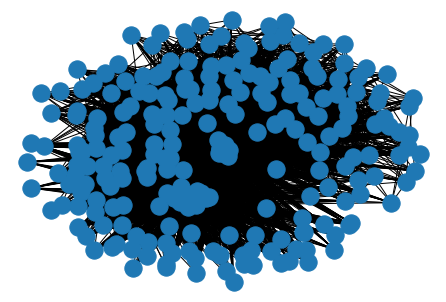

In [36]:
anon_graph = kdegree.construct_graph(array_index, dp_result)
# anon_graph = kdegree.construct_graph(array_index, greedy_result)
    
if anon_graph == None: 
    print("Graph unrealizable.")
else:
    print("Graph realizable with k: ", k)
    nx.draw(anon_graph)


It may be not possible construct a graph from an anonymized vector d. If this happens it is required to try the algorithm with a different k.